In [1]:
import pandas as pd
import os
os.environ[ 'MPLCONFIGDIR' ] = '/tmp/'
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_DSIZE_DOUBLINGS = 12

In [3]:
spark = pd.read_csv('AWS Results/spark_etl_results.csv')

In [4]:
results_df_pandas = pd.read_csv('AWS Results/results_df_pandas.csv',index_col=0)

In [5]:
results_df_rapids = pd.read_csv('AWS Results/results_df_rapids_etl.csv',index_col=0)

In [202]:
# Defining the plot that is used
def plot(axs, averages_pandas, averages_rapids, averages_spark, test):
    axs.bar(x = ind, 
            height=averages_pandas, 
            width = width, 
            color='royalblue', label='Pandas')

    axs.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')
    axs.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    axs.set_ylabel('Average Time (s)')
    axs.set_xlabel('Data Set Size (GB)')
    axs.set_title(f"Test: {test}",fontweight="bold", fontsize=27)
    axs.xaxis.label.set_fontsize(25)
    axs.yaxis.label.set_fontsize(25)
    for item in (axs.get_xticklabels() + axs.get_yticklabels()):
        item.set_fontsize(25)
        
    axs.legend(loc='upper left',prop={'size': 25})
    axs.set_xticks(ticks=ind + width/2, 
              labels=bar_labels)
    
    if test == 'Mean':
        ax_new = fig.add_axes([0.69, 0.89,0.3, 0.08])
        plt.ylim(0, 0.006)
    elif test == 'Sort':
        ax_new = fig.add_axes([0.69, 0.692,0.3, 0.08])
        plt.ylim(0, 0.25)
    elif test == 'Merge':
        ax_new = fig.add_axes([0.69, 0.495,0.3, 0.08])
        plt.ylim(0, .5)
    elif test == 'Filter':
        ax_new = fig.add_axes([0.69, 0.296, 0.3, 0.08])
        plt.ylim(0, .08)
    else:
        ax_new = fig.add_axes([0.69, 0.098, 0.3, 0.08])
        plt.ylim(0, 1)
        
        
    ax_new.bar(x = ind, 
    height=averages_pandas, 
    width = width, 
    color='royalblue', label='Scikit-Learn')

    ax_new.bar(ind+width, 
                height=averages_rapids, 
                width = width, 
                color='seagreen',label='Rapids')

    ax_new.bar(ind+width+width, 
            height=averages_spark, 
            width = width, 
            color='purple',label='Spark')

    ax_new.set_xticks([])
    for item in ax_new.get_yticklabels():
        item.set_fontsize(20)
        
    return axs

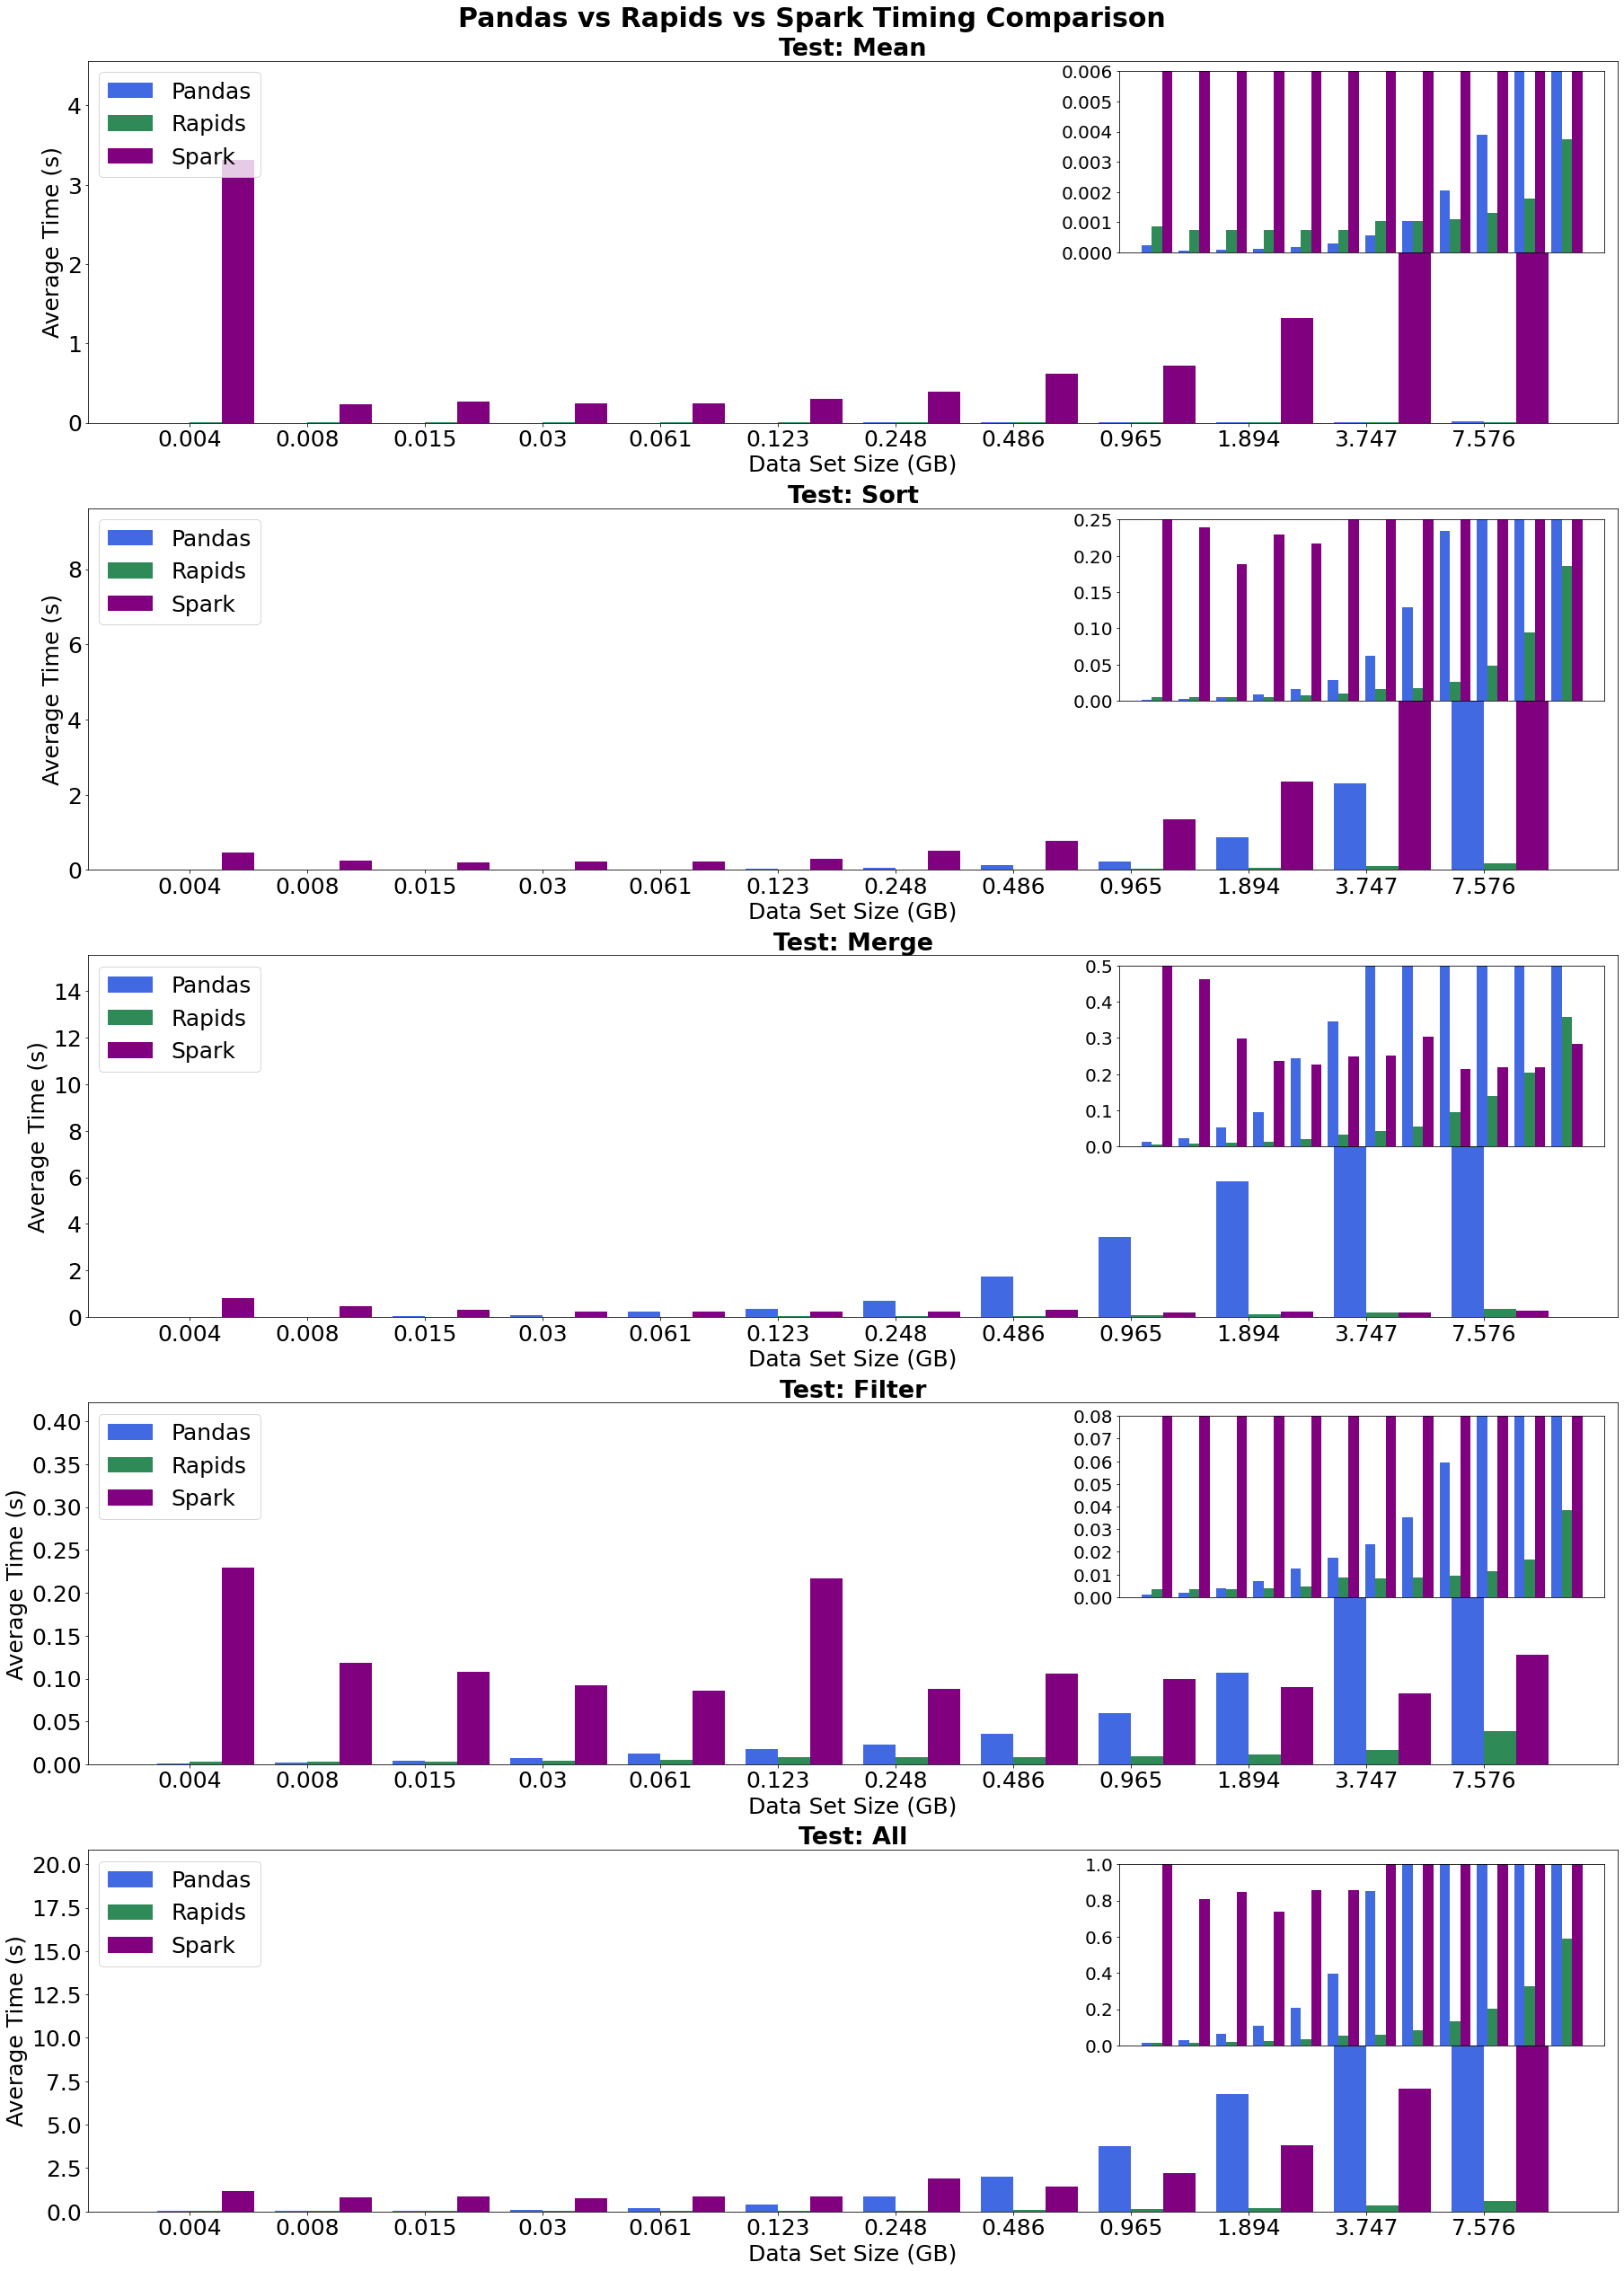

In [204]:
# Creating the plot matrix

# Computing an array to hold the test names
tests = results_df_pandas['Test'].drop_duplicates().values


# Creating the subfigures
fig, axs = plt.subplots(5,constrained_layout = True)

# Setting the title
fig.suptitle('Pandas vs Rapids vs Spark Timing Comparison', fontsize=30, fontweight="bold")

# Setting the fig size
fig.set_size_inches(25, 35)

# Setting the number of bars
ind = np.arange(0, NUM_DSIZE_DOUBLINGS*2, 2)

# Defining the width between the bars
width = 0.55

# Defining the bar labels
bar_labels = np.round(results_df_pandas['Test Size'].drop_duplicates(), 3).astype(str)

# Plotting each subplot
for i in range(0,5):
    test = tests[i]
    plot(axs[i], 
             results_df_pandas[results_df_pandas['Test'] == test]['Average'],
             results_df_rapids[results_df_rapids['Test'] == test]['Average'],
             spark[spark['Test'] == test]['Average'],
             test)
    
#     break
plt.savefig('AWS Results/etl_timing.png')
plt.show()